In [193]:
import sys
from functools import partial
from zipfile import ZipFile
import pandas as pd
import numpy as np
import re
sys.path.append('../src')
%matplotlib inline

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Your contact details

In [3]:
# If you're having problem importing this file, copy and paste the contents of "uatt.py" in this cell instead
# of the import statement
from uatt import submit
my_submit = partial(submit, "Avi Hazan", "IAI", "avi@coca-int.com", "0542470502")

# Read data

In [116]:
import re

def clean_content(txt):
    txt = txt.lower()
    txt = re.sub('\W+',' ', str(txt) )
    txt = ''.join(i for i in txt if not i.isdigit())
    txt = txt.replace('exhibit',"")
    return txt

def find_uinque_words(txt):
    words = txt.split()
    unique = []
    for word in words:
        if word not in unique:
            unique.append(word)
            
    return unique 
 
def find_common_words(txt):
    stop_words=set(stopwords.words("english"))
    tokenized_word=word_tokenize(txt)

    filtered_sent=[]
    for w in tokenized_word:
        if w not in stop_words:
            filtered_sent.append(w)

    fdist = FreqDist(filtered_sent)
    fdist = fdist.most_common(20)
    
    common=[]
    for item in fdist:
        common.append(item[0])
    
    return common

data = []
with ZipFile("../data/data.zip") as z:
    for fname in z.namelist():
        if not fname.endswith('.txt') or not fname.startswith('data'):
            continue
            
        content = z.read(fname).decode('utf8')
        content = clean_content(content)
        uniques = find_uinque_words(content)
        common = find_common_words(content)
        
        label, idx = fname[5:-4].split('-', 1)
        data.append((idx,label,content, uniques, common))
df_train = pd.DataFrame(data, columns=("id", "label", "content", "unique", "common"))

df_train.sample(20)




In [217]:


def vectorizer(arr):
    n = 10
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(arr)

    vocabulary = vectorizer.get_feature_names()
    ind  = np.argsort(X.toarray().sum(axis=0))[-n:]

    top_n_words = [vocabulary[a] for a in ind]

    print (top_n_words)
    
def vectoriszer1(arr):
    return Counter(arr.flat).most_common(1)

def vectoriszer2(arr):
    unique, counts = np.unique(arr, return_counts=True)
    return np.asarray((unique, counts)).T


df_train_c = df_train.copy() 
df_train_c = df_train_c.drop(['content'], axis=1)
# df_train_c = df_train_c.groupby('label')


lables = df_train_c['label'].unique()

df_empty = pd.DataFrame({'idx' : lables})
df_empty

some = df_train_c[df_train_c['label'] == 'bylaws']
some

col_bylaws_np = some['unique'].to_numpy()
col_bylaws_np

all_word = np.concatenate((col_bylaws_np), axis=None)
all_word

aaaaa = vectoriszer2(all_word)
aaaaa
#find_common_words(all_word)

#len(all_word)
##for u in df_train_c[df_train_c['label'] == 'bylaws']:
#    print(u)
    

#3df = pd.DataFrame(data=d)
#df_duplicated['Grouped'] = df_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))




array([['_', '1'],
       ['__', '1'],
       ['___', '1'],
       ...,
       ['ý', '1'],
       ['þ', '1'],
       ['⅔', '2']], dtype='<U87')

In [172]:
data = []
with ZipFile("../data/test_data.zip") as z:
    for fname in z.namelist():
        content = z.read(fname).decode('utf8')

        content = clean_content(content)
        uniques = find_uinque_words(content)
        common = find_common_words(content)

        if not fname.endswith('.txt') or not fname.startswith('test'):
            continue
        idx = fname[5:-4]
        data.append((idx,content,uniques,common))
df_test = pd.DataFrame(data, columns=("id", "content", "unique","common"))


df_test.head(10)

,id,content,unique,common
0,acldm,capital trust inc long term incentive plan...,"[capital, trust, inc, long, term, incentive, p...","[award, shares, company, agreement, plan, shal..."
1,acxlg,of trustmark corporation as amended and resta...,"[of, trustmark, corporation, as, amended, and,...","[shall, board, directors, may, corporation, me..."
2,aehlr,herbalife ltd stock incentive plan for emp...,"[herbalife, ltd, stock, incentive, plan, for, ...","[optionee, option, company, plan, agreement, m..."
3,aerlh,this stock option agreement the agreement i...,"[this, stock, option, agreement, the, is, made...","[company, option, shares, participant, agreeme..."
4,aisgb,employment agreement effective as of the da...,"[employment, agreement, effective, as, of, the...","[executive, company, shall, agreement, section..."
5,ajqbd,lender party a shandong longkong travel dev...,"[lender, party, a, shandong, longkong, travel,...","[party, loan, b, shall, contract, article, rig..."
6,akjmp,pepco holdings inc performance based m thi...,"[pepco, holdings, inc, performance, based, m, ...","[stock, participant, shall, award, section, co..."
7,akpvz,this employment agreement agreement effecti...,"[this, employment, agreement, effective, as, o...","[employee, agreement, company, shall, employme..."
8,aktjz,the securities offered hereby have not been r...,"[the, securities, offered, hereby, have, not, ...","[securities, company, optionee, options, act, ..."
9,alcuh,hei b hawaiian electric industries inc with...,"[hei, b, hawaiian, electric, industries, inc, ...","[company, shall, option, section, shares, empl..."


In [171]:
##Prepare DataFrame


df_test.loc[df_test["content"].str.contains("employment"),"label"]

0      rsu
2      rsu
3      rsu
4      rsu
6      rsu
      ... 
817    rsu
818    rsu
819    rsu
820    rsu
821    rsu
Name: label, Length: 612, dtype: object

# Plot distribution of labels

<AxesSubplot:>

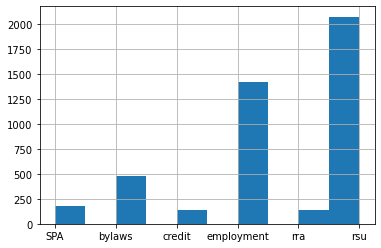

In [6]:
df_train["label"].hist()

# Submit
## Sample submission 1: "All RSU"

In [170]:
# for all documents
df_test["label"] = "rsu"
#df_test.loc[df_test["content"].str.contains("employment"),"label"] = 'employment'
#df_test.loc[df_test["content"].str.contains("credit"),"label"] = 'credit'


submission = dict(df_test[["id","label"]].values)

#submission name must be unique
submission_name = "Avi_H_most_likely"
my_submit(submission_name, submission)


AttributeError: 'Series' object has no attribute 'contains'

In [118]:
item = str(df_test.head(1)['content'])

print(len(item))

item = item.replace("\xa0", " ")  
item = item.replace("\x0c", " ")



40


In [15]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

item = df_test.head(1)

print(len(str(item['content'])))



con = str(item['content']).replace('\n', " ").replace('\\n'," ")
print(con)
tokenized_word=word_tokenize(con)
tokenized_word

fdist = FreqDist(tokenized_word)
print(fdist)

print(fdist.most_common(50))


83
0    Exhibit 10.4  CAPITAL TRUST, INC.  2007 LO... Name: content, dtype: object
<FreqDist with 15 samples and 17 outcomes>
[(',', 2), (':', 2), ('0', 1), ('Exhibit', 1), ('10.4', 1), ('CAPITAL', 1), ('TRUST', 1), ('INC.', 1), ('2007', 1), ('LO', 1), ('...', 1), ('Name', 1), ('content', 1), ('dtype', 1), ('object', 1)]


In [108]:
# for all documents
df_test["label"] = "rsu"
print(df_test)
submission = dict(df_test[["id","label"]].values)
#submission name must be unique
submission_name = "Avi_H_most_likely"
my_submit(submission_name, submission)

        id                                            content  \
0    acldm     capital trust inc  long term incentive plan...   
1    acxlg   of trustmark corporation as amended and resta...   
2    aehlr     herbalife ltd  stock incentive plan for emp...   
3    aerlh     this stock option agreement the agreement i...   
4    aisgb     employment agreement effective as of the da...   
..     ...                                                ...   
817  zvwqm     amp holding inc this nonstatutory stock opt...   
818  zwnhd   amended and restated this amended and restate...   
819  zwvfk     this agreement made and entered into as of ...   
820  zxmpl    i of mccormick company incorporated amended ...   
821  zyfno     employment agreement dated october   effect...   

                                                unique  \
0    [capital, trust, inc, long, term, incentive, p...   
1    [of, trustmark, corporation, as, amended, and,...   
2    [herbalife, ltd, stock, incentive, plan,

0.46958637469586

## Sample submission 2: Submission by string search


In [115]:
df_test["label"] = "rsu"

df_test.loc[df_test["content"].str.contains("purchaser"),"label"] = 'spa'
df_test.loc[df_test["content"].str.contains("credit"),"label"] = 'credit'
df_test.loc[df_test["content"].str.contains("regsitrar"),"label"] = 'rra'
df_test.loc[df_test["content"].str.contains("bylaws"),"label"] = 'bylaws'
df_test.loc[df_test["content"].str.contains("stock"),"label"] = 'bylaws'
df_test.loc[df_test["content"].str.contains("lender"),"label"] = 'credit'
df_test.loc[df_test["content"].str.contains("borrower"),"label"] = 'credit'
df_test.loc[df_test["content"].str.contains("employment"),"label"] = 'employment'

print(df_test[["id","label"]].values)

submission = dict(df_test[["id","label"]].values)
submission_name = "Avi_H_string_search"
my_submit(submission_name, submission)

[['acldm' 'employment']
 ['acxlg' 'bylaws']
 ['aehlr' 'employment']
 ...
 ['zwvfk' 'employment']
 ['zxmpl' 'employment']
 ['zyfno' 'employment']]


0.43187347931873

# See how you rank
Leaderboard is available at:
https://goren.ml/uattcontract

Accuracy of **90%** and above is required to pass the test

## Leaderboard not refreshing ?
try adding a random suffix to it, like this one:

In [102]:
import random, string
from IPython.display import HTML
rand_str = lambda: "".join(random.sample(string.ascii_letters,7))
HTML('<a href="https://goren.ml/uattcontract/?{k}={v}" target="_blank">Go to Leaderboard</a>'.format(k=rand_str(),v=rand_str()))